# Linear regression模型

In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## 1.读取数据

In [3]:
data = pd.read_csv('Income1.csv')

## 2.查看数据信息

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


## 3.查看数据

In [5]:
data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


## 4.生成图表

Text(0, 0.5, 'Income')

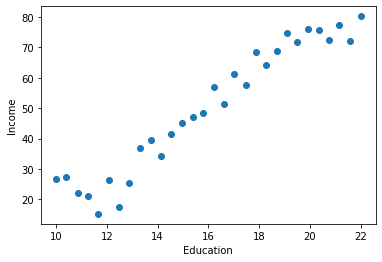

In [10]:
plt.scatter(data.Education,data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

## 5.数据预处理，类型转换
array(30,)->array(30,1)->tensor(30,0)

In [11]:
data.Education.values

array([10.        , 10.40133779, 10.84280936, 11.24414716, 11.64548495,
       12.08695652, 12.48829431, 12.88963211, 13.2909699 , 13.73244147,
       14.13377926, 14.53511706, 14.97658863, 15.37792642, 15.77926421,
       16.22073579, 16.62207358, 17.02341137, 17.46488294, 17.86622074,
       18.26755853, 18.7090301 , 19.11036789, 19.51170569, 19.91304348,
       20.35451505, 20.75585284, 21.15719064, 21.59866221, 22.        ])

In [12]:
data.Education.values.shape

(30,)

In [13]:
data.Education.values.reshape(-1,1)

array([[10.        ],
       [10.40133779],
       [10.84280936],
       [11.24414716],
       [11.64548495],
       [12.08695652],
       [12.48829431],
       [12.88963211],
       [13.2909699 ],
       [13.73244147],
       [14.13377926],
       [14.53511706],
       [14.97658863],
       [15.37792642],
       [15.77926421],
       [16.22073579],
       [16.62207358],
       [17.02341137],
       [17.46488294],
       [17.86622074],
       [18.26755853],
       [18.7090301 ],
       [19.11036789],
       [19.51170569],
       [19.91304348],
       [20.35451505],
       [20.75585284],
       [21.15719064],
       [21.59866221],
       [22.        ]])

In [14]:
data.Education.values.reshape(-1,1).shape

(30, 1)

In [15]:
from torch import nn

In [16]:
X = torch.from_numpy(data.Education.values.reshape(-1,1).astype(np.float32))
X

tensor([[10.0000],
        [10.4013],
        [10.8428],
        [11.2441],
        [11.6455],
        [12.0870],
        [12.4883],
        [12.8896],
        [13.2910],
        [13.7324],
        [14.1338],
        [14.5351],
        [14.9766],
        [15.3779],
        [15.7793],
        [16.2207],
        [16.6221],
        [17.0234],
        [17.4649],
        [17.8662],
        [18.2676],
        [18.7090],
        [19.1104],
        [19.5117],
        [19.9130],
        [20.3545],
        [20.7559],
        [21.1572],
        [21.5987],
        [22.0000]])

In [17]:
# 同样处理Income
Y = torch.from_numpy(data.Income.values.reshape(-1,1).astype(np.float32))

## 6.初始化模型、损失函数、目标函数

In [18]:
model = nn.Linear(1, 1) # 线性模型Y = W * X + b 等价于 model(input)

In [19]:
loss_fn = nn.MSELoss() # 损失函数，均方误差

In [20]:
opt = torch.optim.SGD(model.parameters(), lr=0.0001) # 目标函数，指定优化参数，parameters方法返回参数，lr为学习率

## 7.训练模型

In [21]:
for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = model(x)           # 使用模型预测
        loss = loss_fn(y, y_pred)   # 根据预测结果计算损失
        opt.zero_grad()             # 梯度清零
        loss.backward()             # 反向传播求解梯度
        opt.step()                  # 优化模型

查看结果

In [22]:
model.weight

Parameter containing:
tensor([[4.9715]], requires_grad=True)

In [23]:
model.bias

Parameter containing:
tensor([-28.3138], requires_grad=True)

## 8.图表展示

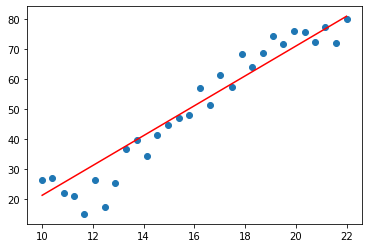

In [24]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), model(X).data.numpy(), c='r')